# Exploratory Data Analysis - *Hotel Bookings*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'Exploratory Data Analysis Pt-1.ipynb',
 'Exploratory Data Analysis Pt-2.ipynb',
 'Exploratory Data Analysis Pt-3.ipynb',
 'Food and Calories - Sheet1.csv',
 'hotel_bookings.csv',
 'pokemon.png',
 'pokemons.csv']

In [3]:
# ANSI Escape Codes for BOLD and Resetting formatting - to be used in print() method ..

B = "\033[1m"
R = "\033[0m"

In [4]:
# To avoid the data read error for UTF and other formats ..
import chardet

with open("hotel_bookings.csv", 'rb') as f:
    raw_data = f.read()
    result = chardet.detect(raw_data)
    detected_encoding = result['encoding']
    print(f"Detected encoding: {B}{detected_encoding}{R}")

Detected encoding: ascii


In [5]:
data = pd.read_csv("hotel_bookings.csv", encoding = detected_encoding)
print("Dataset has been read successfully.")

Dataset has been read successfully.


In [6]:
data.sample(10)

hotel  is_canceled  lead_time  arrival_date_year  \
10471  Resort Hotel            1        100               2017   
16650  Resort Hotel            0        205               2015   
8729   Resort Hotel            0        364               2016   
10661  Resort Hotel            1         11               2017   
20581  Resort Hotel            0          0               2016   
70988    City Hotel            1        154               2017   
52546    City Hotel            1         56               2016   
10466  Resort Hotel            1         86               2017   
26279  Resort Hotel            0        106               2016   
37073  Resort Hotel            0         70               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
10471              March                        10                          9   
16650          September                        36                          4   
8729             October                        42                         12   
10661              March                        13                         26   
20581           February                         6                          3   
70988               June                        26                         26   
52546               June                        24                          8   
10466              March                        10                          9   
26279               July                        30                         21   
37073               June                        23                          4   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
10471                        0                     3       2  ...   
16650                        0                     2       1  ...   
8729                         0                     4       2  ...   
10661                        2                     4       2  ...   
20581                        0                     1       1  ...   
70988                        2                     5       2  ...   
52546                        0                     1       2  ...   
10466                        0                     3       2  ...   
26279                        2                     4       2  ...   
37073                        2                     0       2  ...   

       deposit_type  agent company days_in_waiting_list    customer_type  \
10471    No Deposit  240.0     NaN                    0        Transient   
16650    No Deposit    NaN     NaN                    0  Transient-Party   
8729     No Deposit    NaN   223.0                    0  Transient-Party   
10661    No Deposit  314.0     NaN                    0        Transient   
20581    No Deposit    NaN     NaN                    0        Transient   
70988    No Deposit    9.0     NaN                    0        Transient   
52546    No Deposit  191.0     NaN                    0  Transient-Party   
10466    Non Refund   67.0     NaN                    0        Transient   
26279    No Deposit  240.0     NaN                    0        Transient   
37073    No Deposit  240.0     NaN                    0        Transient   

          adr  required_car_parking_spaces  total_of_special_requests  \
10471   75.00                            0                          1   
16650   66.00                            0                          1   
8729    66.00                            0                          0   
10661   44.64                            0                          0   
20581   39.00                            0                          0   
70988  123.17                            0                          0   
52546  120.00                            0                          0   
10466   46.00                            0                          0   
26279  226.00                            1                          0   
37073  157.00                            1                          

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
data.describe().T

count         mean         std      min  \
is_canceled                     119390.0     0.370416    0.482918     0.00   
lead_time                       119390.0   104.011416  106.863097     0.00   
arrival_date_year               119390.0  2016.156554    0.707476  2015.00   
arrival_date_week_number        119390.0    27.165173   13.605138     1.00   
arrival_date_day_of_month       119390.0    15.798241    8.780829     1.00   
stays_in_weekend_nights         119390.0     0.927599    0.998613     0.00   
stays_in_week_nights            119390.0     2.500302    1.908286     0.00   
adults                          119390.0     1.856403    0.579261     0.00   
children                        119386.0     0.103890    0.398561     0.00   
babies                          119390.0     0.007949    0.097436     0.00   
is_repeated_guest               119390.0     0.031912    0.175767     0.00   
previous_cancellations          119390.0     0.087118    0.844336     0.00   
previous_bookings_not_canceled  119390.0     0.137097    1.497437     0.00   
booking_changes                 119390.0     0.221124    0.652306     0.00   
agent                           103050.0    86.693382  110.774548     1.00   
company                           6797.0   189.266735  131.655015     6.00   
days_in_waiting_list            119390.0     2.321149   17.594721     0.00   
adr                             119390.0   101.831122   50.535790    -6.38   
required_car_parking_spaces     119390.0     0.062518    0.245291     0.00   
total_of_special_requests       119390.0     0.571363    0.792798     0.00   

                                    25%       50%     75%     max  
is_canceled                        0.00     0.000     1.0     1.0  
lead_time                         18.00    69.000   160.0   737.0  
arrival_date_year               2016.00  2016.000  2017.0  2017.0  
arrival_date_week_number          16.00    28.000    38.0    53.0  
arrival_date_day_of_month          8.00    16.000    23.0    31.0  
stays_in_weekend_nights            0.00     1.000     2.0    19.0  
stays_in_week_nights               1.00     2.000     3.0    50.0  
adults                             2.00     2.000     2.0    55.0  
children                           0.00     0.000     0.0    10.0  
babies                             0.00     0.000     0.0    10.0  
is_repeated_guest                  0.00     0.000     0.0     1.0  
previous_cancellations             0.00     0.000     0.0    26.0  
previous_bookings_not_canceled     0.00     0.000     0.0    72.0  
booking_changes                    0.00     0.000     0.0    21.0  
agent                              9.00    14.000   229.0   535.0  
company                           62.00   179.000   270.0   543.0  
days_in_waiting_list               0.00     0.000     0.0   391.0  
adr                               69.29    94.575   126.0  5400.0  
required_car_parking_spaces        0.00     0.000     0.0     8.0  
total_of_special_requests          0.00     0.000     1.0     5.0

In [9]:
print(f"Summary of NULL Values found in the dataset : \n{B}{data.isna().sum()}{R}")

Summary of NULL Values found in the dataset : 
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent     

In [10]:
print(f"\nSummary of percentage of {B}duplicate values{R} found in the features :\n")
for col in data.columns:
    duplicate_percentage = round((data[col].duplicated().sum()/len(data) * 100), 2)
    if duplicate_percentage > 0:
        print(f"{col:<30} : {B}{duplicate_percentage}{R}")


Summary of percentage of duplicate values found in the features :

hotel                          : 100.0
is_canceled                    : 100.0
lead_time                      : 99.6
arrival_date_year              : 100.0
arrival_date_month             : 99.99
arrival_date_week_number       : 99.96
arrival_date_day_of_month      : 99.97
stays_in_weekend_nights        : 99.99
stays_in_week_nights           : 99.97
adults                         : 99.99
children                       : 99.99
babies                         : 100.0
meal                           : 100.0
country                        : 99.85
market_segment                 : 99.99
distribution_channel           : 100.0
is_repeated_guest              : 100.0
previous_cancellations         : 99.99
previous_bookings_not_canceled : 99.94
reserved_room_type             : 99.99
assigned_room_type             : 99.99
booking_changes                : 99.98
deposit_type                   : 100.0
agent                          : 99.

In [11]:
print(f"\nSummary of percentage of {B}Unique values{R} found in the features :\n")
for col in data.columns:
    unique_percentage = round((data[col].nunique()/len(data) * 100), 2)
    if unique_percentage > 0:
        print(f"{col:<30} : {B}{unique_percentage}{R}")


Summary of percentage of Unique values found in the features :

lead_time                      : 0.4
arrival_date_month             : 0.01
arrival_date_week_number       : 0.04
arrival_date_day_of_month      : 0.03
stays_in_weekend_nights        : 0.01
stays_in_week_nights           : 0.03
adults                         : 0.01
country                        : 0.15
market_segment                 : 0.01
previous_cancellations         : 0.01
previous_bookings_not_canceled : 0.06
reserved_room_type             : 0.01
assigned_room_type             : 0.01
booking_changes                : 0.02
agent                          : 0.28
company                        : 0.29
days_in_waiting_list           : 0.11
adr                            : 7.44
total_of_special_requests      : 0.01
reservation_status_date        : 0.78


<Axes: >

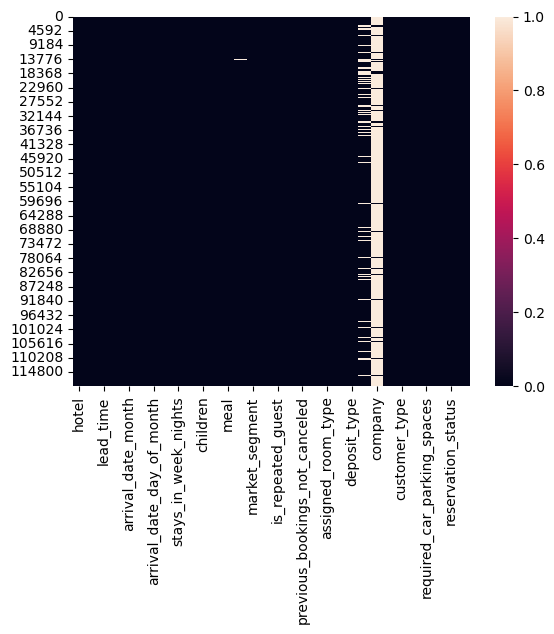

In [12]:
sns.heatmap(data.isnull())

In [13]:
print(f"\nSummary of percentage of {B}NULL values{R} found in the features :\n")
for col in data.columns:
    null_percentage = round((data[col].isnull().sum()/len(data) * 100), 2)
    if null_percentage > 0:
        print(f"{col:<10} : {B}{null_percentage}{R}")


Summary of percentage of NULL values found in the features :

country    : 0.41
agent      : 13.69
company    : 94.31


In [14]:
data.select_dtypes(include = 'object').columns.tolist()

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

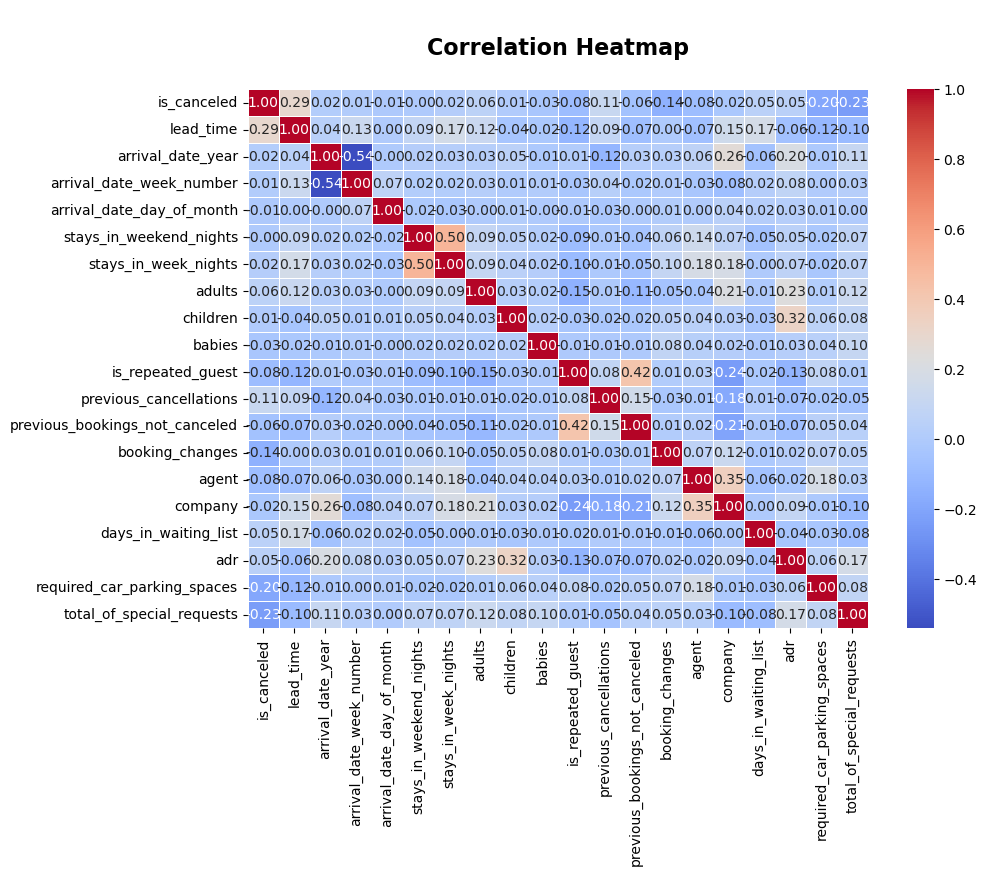

In [15]:
plt.figure(figsize = (10, 7))
sns.heatmap(data.drop(data.select_dtypes(include = 'object').columns.tolist(), axis = 1).corr(),
            annot = True,
            cmap = 'coolwarm',
            fmt = '.2f',
            linewidths = 0.5,
            annot_kws={"size": 10})
plt.title("\nCorrelation Heatmap\n", fontweight = 'bold', fontsize = 16)
plt.show()

### We can observe `company` has 94.31% of missing data, hence we can drop the feature, it may help in better analysis.

In [16]:
data.shape

(119390, 32)

In [17]:
data.drop('company', axis = 1, inplace = True)
data.shape

(119390, 31)

In [18]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [19]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [20]:
data.select_dtypes(include=['category']).columns.tolist()

[]

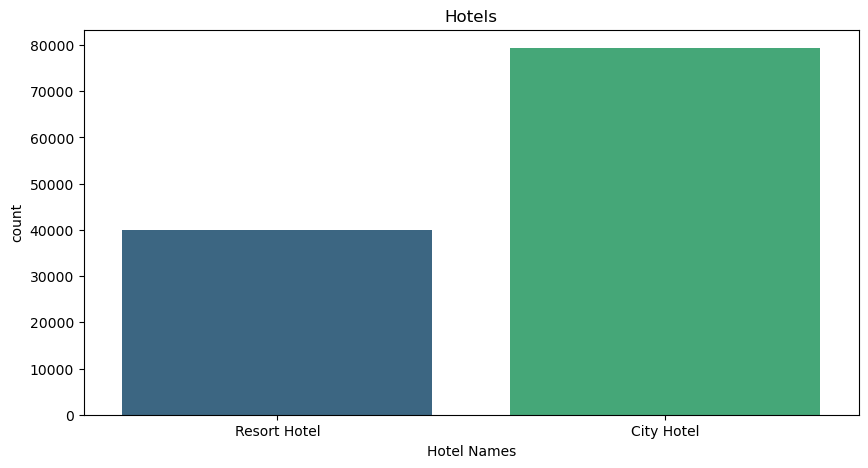

In [21]:
plt.figure(figsize = (10, 5))
sns.countplot(data = data, x = 'hotel', palette = 'viridis')
plt.xlabel("Hotel Names")
plt.title("Hotels")
plt.show()

In [22]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   booking_changes  deposit_type  agent days_in_waiting_list customer_type  \
0                3    No Deposit    NaN                    0     Transient   
1                4    No Deposit    NaN                    0     Transient   
2                0    No Deposit    NaN                    0     Transient   
3                0    No Deposit  304.0                    0     Transient   
4                0    No Deposit  240.0                    0     Transient   

    adr  required_car_parking_spaces  total_of_special_requests  \
0   0.0                            0                          0   
1   0.0                            0                          0   
2  75.0                            0                          0   
3  75.0                            0                          0   
4  98.0                            0                          1   

   reservation_status reservation_status_date  
0           Check-Out              2015-07-01  
1           Check-Out              2015-07-01  
2           Check-Out              2015-07-02  
3           Check-Out              2015-07-02  
4           Check-Out              2015-07-03  

[5 rows x 31 columns]

### Representation of arrivals each month

In [23]:
months = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
]

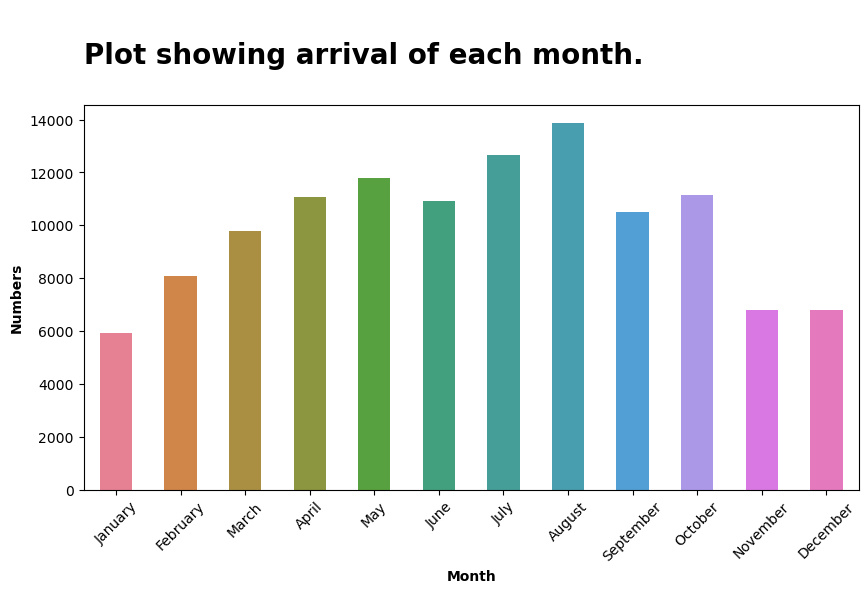

In [24]:
plt.figure(figsize = (10, 5))
sns.countplot(data = data,
              x = data.arrival_date_month.sort_values(),
              order = months,
              width = 0.5,
              palette = 'husl')
plt.xticks(rotation = 45)
plt.xlabel("Month", fontweight = 'bold')
plt.ylabel("Numbers", fontweight = 'bold')
plt.title("\nPlot showing arrival of each month.\n",
          fontsize = 20,
          fontweight = 'bold',
          loc = 'left')
plt.show()

### Ratio of Hotel Booking Cancelled

In [25]:
data.is_canceled.unique()

array([0, 1], dtype=int64)

In [26]:
data.is_canceled.value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

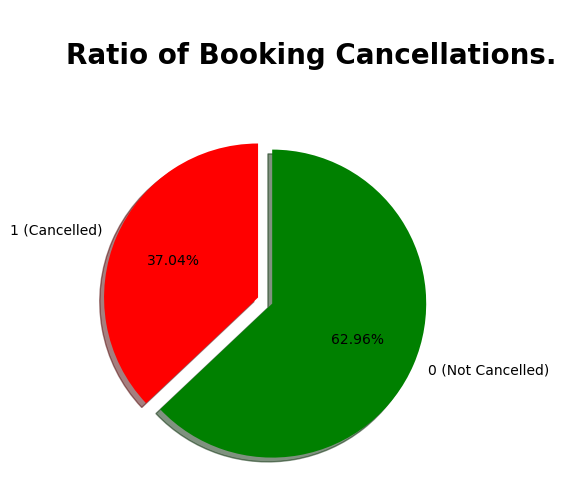

In [28]:
plt.figure(figsize = (10, 5))
plt.pie(data.is_canceled.value_counts(),
        labels = ['0 (Not Cancelled)', '1 (Cancelled)'],
        autopct = "%.2f%%",
        shadow = True,
        explode = [0.1, 0],
        colors = ['green', 'red'],
        counterclock = False,
        startangle = -270
       )
plt.title("\nRatio of Booking Cancellations.\n",
          fontsize = 20,
          fontweight = 'bold',
          loc = 'left')
plt.show()

### Hotel Arrival Years

In [29]:
data.arrival_date_year.unique()

array([2015, 2016, 2017], dtype=int64)

In [30]:
data.arrival_date_year.value_counts()

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

In [31]:
arrival_order = data.arrival_date_year.value_counts().sort_index().index.tolist()
arrival_order

[2015, 2016, 2017]

In [32]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(data = data,
              x = data.arrival_date_year.sort_values(),
              order = data.arrival_date_year.value_counts().sort_index().index.tolist(),
              width = 0.3, palette = 'husl')
for container in ax.containers:
    ax.bar_label(container, fontweight = 'bold')
plt.title("\nHotel Arrival Data (YEAR)\n", fontweight = 'bold', fontsize = 18)
plt.xlabel("Year", fontweight = 'bold', fontsize = 16)
plt.ylabel("Numbers", fontweight = 'bold', fontsize = 16)
plt.show()

### Parking Requirements

In [33]:
data.required_car_parking_spaces.unique()

array([0, 1, 2, 8, 3], dtype=int64)

In [34]:
data.required_car_parking_spaces.unique().tolist()

[0, 1, 2, 8, 3]

In [35]:
data.required_car_parking_spaces.value_counts()

required_car_parking_spaces
0    111974
1      7383
2        28
3         3
8         2
Name: count, dtype: int64

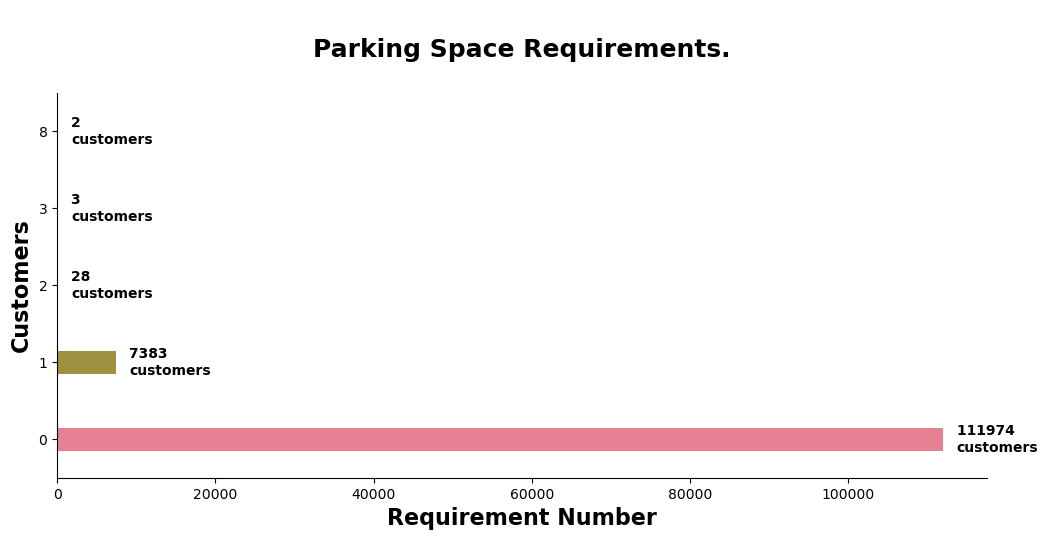

In [36]:
plt.figure(figsize = (12, 5))
ax = sns.countplot(data = data,
              y = data.required_car_parking_spaces,
              order = data.required_car_parking_spaces.value_counts().sort_index().index.tolist(),
              width = 0.3, palette = 'husl')
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'{x:g} \ncustomers',
                 fontweight = 'bold',
                 fontsize = 10,
                 padding = 10)
plt.title("\nParking Space Requirements.\n", fontweight = 'bold', fontsize = 18)
plt.xlabel("Requirement Number", fontweight = 'bold', fontsize = 16)
plt.ylabel("Customers", fontweight = 'bold', fontsize = 16)
ax.invert_yaxis()
sns.despine()
plt.show()

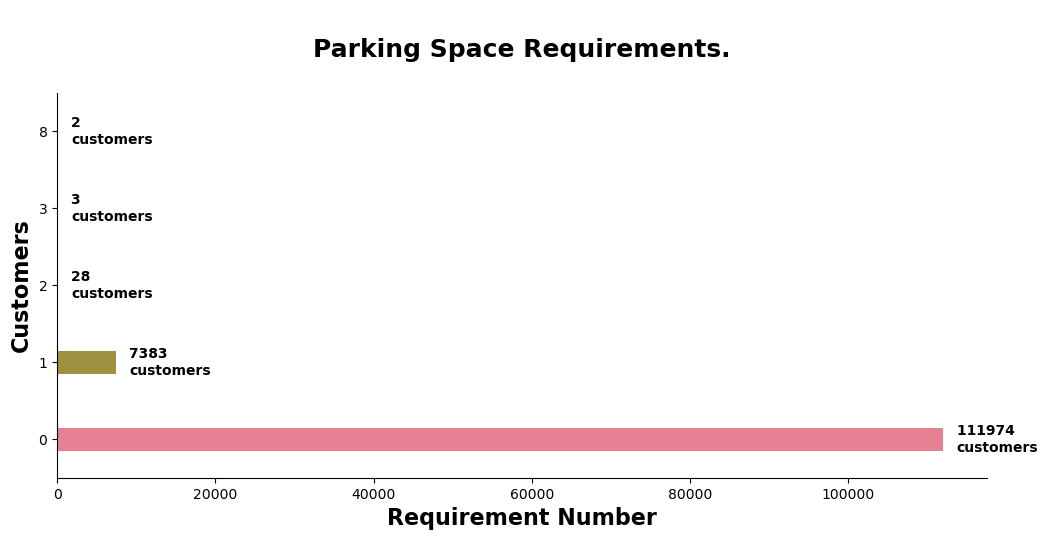

In [37]:
plt.figure(figsize = (12, 5))
ax = sns.countplot(data = data,
              y = data.required_car_parking_spaces,
              order = data.required_car_parking_spaces.value_counts().sort_index().index.tolist(),
              width = 0.3, palette = 'husl')
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'{x:g} \ncustomers',
                 fontweight = 'bold',
                 fontsize = 10,
                 padding = 10)
plt.title("\nParking Space Requirements.\n", fontweight = 'bold', fontsize = 18)
plt.xlabel("Requirement Number", fontweight = 'bold', fontsize = 16)
plt.ylabel("Customers", fontweight = 'bold', fontsize = 16)
ax.invert_yaxis()
sns.despine()
plt.show()